In [2]:
import pandas as pd
import numpy
import datetime

censusTractData = pd.read_csv("./acs2017_census_tract_data.csv")

counties = censusTractData["County"].unique()
entries = []
for county in counties:
    # Find all the entries for the county
    county_data = censusTractData[censusTractData['County'] == county]

    # Get the states for the given county name, and calculate the data for the state/county combinations
    states = county_data['State'].unique()
    for state in states:
        # Find all the entries for this state and county
        state_county_data = county_data[county_data['State'] == state]
        
        # Calculate the field we want
        total_population = state_county_data['TotalPop'].sum()
        
        population_in_poverty = numpy.array(state_county_data['TotalPop']) * (numpy.array(state_county_data['Poverty'])/100)
        population_in_poverty = population_in_poverty[~numpy.isnan(population_in_poverty)]
        overall_poverty_percentage = (numpy.sum(population_in_poverty) / total_population) * 100

        total_incomes_per_population = numpy.array(state_county_data['TotalPop']) * numpy.array(state_county_data['IncomePerCap'])
        total_incomes_per_population = total_incomes_per_population[~numpy.isnan(total_incomes_per_population)]
        total_income_per_capita = numpy.sum(total_incomes_per_population) / total_population

        # Save the fields (along with the state and county names)
        entries.append([state, county.replace(" County", ""), total_population, overall_poverty_percentage, total_income_per_capita])
        
County_Info = pd.DataFrame(entries, columns=['State', 'County', 'Total Population', 'Poverty %', 'Per Capita Income'])


In [3]:

print(County_Info.query("County == 'Loudoun' and State == 'Virginia'"))
print(County_Info.query("County == 'Washington' and State == 'Oregon'"))
print(County_Info.query("County == 'Harlan' and State == 'Kentucky'"))
print(County_Info.query("County == 'Malheur' and State == 'Oregon'"))

max_population = County_Info['Total Population'].max()
min_population = County_Info['Total Population'].min()

print(County_Info.query(f"`Total Population` == {max_population}"))
print(County_Info.query(f"`Total Population` == {min_population}"))


         State   County  Total Population  Poverty %  Per Capita Income
3000  Virginia  Loudoun            374558   3.689598       50455.645745
      State      County  Total Population  Poverty %  Per Capita Income
426  Oregon  Washington            572071  10.321202       35369.047499
         State  County  Total Population  Poverty %  Per Capita Income
1824  Kentucky  Harlan             27548  35.669482       15456.971032
       State   County  Total Population  Poverty %  Per Capita Income
2629  Oregon  Malheur             30421  24.298225       17567.504323
          State       County  Total Population  Poverty %  Per Capita Income
782  California  Los Angeles          10105722  16.998271       30798.189407
      State  County  Total Population  Poverty %  Per Capita Income
2877  Texas  Loving                74       17.1            35530.0


In [4]:
covidData = pd.read_csv("./COVID_county_data.csv")

# Get the individual counties, then combine all the data for the state/county combinations
counties = covidData["county"].unique()
entries = []
for county in counties:
    # Find all the entries for the county
    county_data = covidData[covidData['county'] == county]

    # Get the states for the given county name, and calculate the data for the state/county combinations
    states = county_data['state'].unique()
    for state in states:
        # Find all the entries for this state and county
        state_county_data = county_data[county_data['state'] == state]
        #print(state_county_data)

        # Calculate the fields we want
        total_cases = state_county_data['cases'].sum()
        total_deaths = state_county_data['deaths'].sum()

        feb_2021_start = datetime.datetime(2021, 1, 1)
        feb_2021_end = datetime.datetime(2021, 1, 28)
        feb_2021_rows = pd.to_datetime(state_county_data['date']).between(feb_2021_start, feb_2021_end, inclusive=True)
        feb_2021_data = state_county_data[feb_2021_rows]
        
        cases_reported_feb_2021 = feb_2021_data['cases'].sum()
        deaths_reported_feb_2021 = feb_2021_data['deaths'].sum()
        
        # Save the fields (along with the state and county names)
        entries.append([state, county, total_cases, total_deaths, cases_reported_feb_2021, deaths_reported_feb_2021])

# Write all the values we've saved to a new csv
covid_feb_monthly = pd.DataFrame(entries, columns=["State", "County", "TotalCases", "TotalDeaths", "Feb2021Cases", "Feb2021Deaths"])


C:\Users\15039\AppData\Local\Temp/ipykernel_8284/1574576849.py:23: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  feb_2021_rows = pd.to_datetime(state_county_data['date']).between(feb_2021_start, feb_2021_end, inclusive=True)


In [5]:

aug_entries = []
for county in counties:
    # Find all the entries for the county
    county_data = covidData[covidData['county'] == county]

    # Get the states for the given county name, and calculate the data for the state/county combinations
    states = county_data['state'].unique()
    for state in states:
        # Find all the entries for this state and county
        state_county_data = county_data[county_data['state'] == state]
        #print(state_county_data)

        # Calculate the fields we want
        total_cases = state_county_data['cases'].sum()
        total_deaths = state_county_data['deaths'].sum()

        aug_2020_start = datetime.datetime(2020, 8, 1)
        aug_2020_end = datetime.datetime(2020, 8, 30)
        aug_2020_rows = pd.to_datetime(state_county_data['date']).between(aug_2020_start, aug_2020_end, inclusive=True)
        aug_2020_data = state_county_data[aug_2020_rows]
        
        cases_reported_aug_2020 = aug_2020_data['cases'].sum()
        deaths_reported_aug_2020 = aug_2020_data['deaths'].sum()
        
        #Save the fields (along with the state and county names)
        aug_entries.append([state, county, total_cases, total_deaths, cases_reported_aug_2020, deaths_reported_aug_2020])

# Write all the values we've saved to a new csv
covid_aug_monthly = pd.DataFrame(aug_entries, columns=["State", "County", "TotalCases", "TotalDeaths", "Aug2020Cases", "Aug2020Deaths"])


C:\Users\15039\AppData\Local\Temp/ipykernel_8284/663043309.py:22: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  aug_rows = pd.to_datetime(state_county_data['date']).between(aug_start, aug_end, inclusive=True)


In [6]:
entries = []
for county in counties:
    # Find all the entries for the county
    county_data = covidData[covidData['county'] == county]

    # Get the states for the given county name, and calculate the data for the state/county combinations
    states = county_data['state'].unique()
    for state in states:
        # Find all the entries for this state and county
        state_county_data = county_data[county_data['state'] == state]
        #print(state_county_data)

        # Calculate the fields we want
        total_cases = state_county_data['cases'].sum()
        total_deaths = state_county_data['deaths'].sum()

        jan_2021_start = datetime.datetime(2021, 1, 1)
        jan_2021_end = datetime.datetime(2021, 1, 31)
        jan_2021_rows = pd.to_datetime(state_county_data['date']).between(jan_2021_start, jan_2021_end, inclusive=True)
        jan_2021_data = state_county_data[jan_2021_rows]
        
        cases_reported_jan_2021 = jan_2021_data['cases'].sum()
        deaths_reported_jan_2021 = jan_2021_data['deaths'].sum()
        
        # Save the fields (along with the state and county names)
        entries.append([state, county, total_cases, total_deaths, cases_reported_jan_2021, deaths_reported_jan_2021])

# Write all the values we've saved to a new csv
covid_jan_monthly = pd.DataFrame(entries, columns=["State", "County", "TotalCases", "TotalDeaths", "Jan2021Cases", "Jan2021Deaths"])


C:\Users\15039\AppData\Local\Temp/ipykernel_8284/1217578740.py:24: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  jan_2021_rows = pd.to_datetime(state_county_data['date']).between(jan_2021_start, jan_2021_end, inclusive=True)


In [7]:
print(covid_feb_monthly.query("County == 'Malheur'"))
print(covid_aug_monthly.query("County == 'Malheur'"))
print(covid_jan_monthly.query("County == 'Malheur'"))

       State   County  TotalCases  TotalDeaths  Feb2021Cases  Feb2021Deaths
2645  Oregon  Malheur      453634       7770.0         86529         1459.0
       State   County  TotalCases  TotalDeaths  AugCases  AugDeaths
2645  Oregon  Malheur      453634       7770.0         0        0.0
       State   County  TotalCases  TotalDeaths  Jan2021Cases  Jan2021Deaths
2645  Oregon  Malheur      453634       7770.0         96297         1627.0


In [8]:
COVID_summary = County_Info.merge(covid_jan_monthly, how='inner')
COVID_summary = COVID_summary.drop(columns=['Jan2021Cases', 'Jan2021Deaths'])
#print(COVID_summary)

COVID_summary["id"] = COVID_summary.index + 1

cols = list(COVID_summary.columns)
cols = [cols[-1]] + cols[:-1]
COVID_summary = COVID_summary[cols]

In [14]:
def getTotalCasesPer100K(row):
        total_population = int(row['Total Population'])/ 100000
        return int(row['TotalCases'])/ total_population
    
def getTotalDeathsPer100K(row):
        total_population = int(row['Total Population'])/ 100000
        return int(row['TotalDeaths'])/ total_population

COVID_summary['TotalCasesPer100K'] = COVID_summary.apply(lambda row: getTotalCasesPer100K(row), axis=1)
COVID_summary['TotalDeathsPer100K'] = COVID_summary.apply(lambda row: getTotalDeathsPer100K(row), axis=1)

C:\Users\15039\AppData\Local\Temp/ipykernel_8284/2540464618.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COVID_summary['TotalCasesPer100K'] = COVID_summary.apply(lambda row: getTotalCasesPer100K(row), axis=1)
C:\Users\15039\AppData\Local\Temp/ipykernel_8284/2540464618.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COVID_summary['TotalDeathsPer100K'] = COVID_summary.apply(lambda row: getTotalDeathsPer100K(row), axis=1)


In [15]:

print(COVID_summary.query("County == 'Washington' and State == 'Oregon'"))
print(COVID_summary.query("County == 'Malheur' and State == 'Oregon'"))
print(COVID_summary.query("County == 'Loudoun' and State == 'Virginia'"))
print(COVID_summary.query("County == 'Harlan' and State == 'Kentucky'"))

      id   State      County  Total Population  Poverty %  Per Capita Income  \
426  427  Oregon  Washington            572071  10.321202       35369.047499   

     TotalCases  TotalDeaths  TotalCasesPer100K  TotalDeathsPer100K  
426     2157339      22455.0      377110.358679          3925.21208  
        id   State   County  Total Population  Poverty %  Per Capita Income  \
2555  2556  Oregon  Malheur             30421  24.298225       17567.504323   

      TotalCases  TotalDeaths  TotalCasesPer100K  TotalDeathsPer100K  
2555      453634       7770.0       1.491187e+06        25541.566681  
        id     State   County  Total Population  Poverty %  Per Capita Income  \
2926  2927  Virginia  Loudoun            374558   3.689598       50455.645745   

      TotalCases  TotalDeaths  TotalCasesPer100K  TotalDeathsPer100K  
2926     2496450      35820.0       666505.58792          9563.27191  
        id     State  County  Total Population  Poverty %  Per Capita Income  \
1817  1818  K

In [18]:
def calculateR(column1, column2, data, isOregon):
    R = data[column1].corr(data[column2])
    print(R)
    if (R > 0.5 or R < -0.5):
        plotName = column1 + "-" + column2 + ".png"
        if (isOregon == True):
            plotName = "Oregon-" + plotName
        data.plot.scatter(column1, column2).get_figure().savefig("graphs/" + plotName)


# Calculate the correlation between columns for all counties in the state of Oregon
oregon_data = COVID_summary[COVID_summary['State'] == "Oregon"]
calculateR("TotalCases", "Poverty %", oregon_data, True)
calculateR("TotalDeaths", "Poverty %", oregon_data, True)
calculateR("TotalCases", "Per Capita Income", oregon_data, True)
calculateR("TotalDeaths", "Per Capita Income", oregon_data, True)

# Calculate the correlation between columns for all counties
calculateR("TotalCases", "Poverty %", COVID_summary, False)
calculateR("TotalDeaths", "Poverty %", COVID_summary, False)
calculateR("TotalCases", "Per Capita Income", COVID_summary, False)
calculateR("TotalDeaths", "Per Capita Income", COVID_summary, False)

-0.11895289856840797
-0.07086194982221239
0.4787857338001697
0.42613784383071596
-0.03711441310877822
-0.041358910479869344
0.18585952997050903
0.21967385647735752


-0.11895289856840796
0.9662049145438587
0.42613784383071596
0.21967385647735752


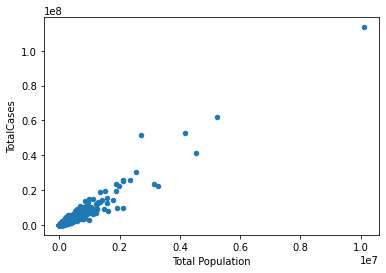

In [23]:
# Calculate the correlation between columns for all counties in the state of Oregon
calculateR("Poverty %", "TotalCases", oregon_data, True)
calculateR("Total Population", "TotalCases", COVID_summary, False)
calculateR("Per Capita Income", "TotalDeaths", oregon_data, True)
calculateR("Per Capita Income", "TotalDeaths", COVID_summary, True)